In [1]:
import pandas as pd
import requests
from urllib.parse import urlencode
import json
import matplotlib
import seaborn as sns

### 1. Создайте датафрейм на основе тестовой Яндекс.Метрики.

In [2]:
url = 'https://api-metrika.yandex.net/stat/v1/data?'
visits = f"metrics=ym:s:visits&dimensions=ym:s:date&filters=ym:s:date=='2024-01-10'&dimensions=ym:s:isRobot&id=44147844"
visits_url = url + visits
response = requests.get(visits_url)

In [3]:
response

<Response [200]>

In [4]:
json_data = response.json()
json_data

{'query': {'ids': [44147844],
  'dimensions': ['ym:s:date', 'ym:s:isRobot'],
  'metrics': ['ym:s:visits'],
  'sort': ['-ym:s:visits'],
  'date1': '2024-01-04',
  'date2': '2024-01-10',
  'filters': "ym:s:date=='2024-01-10'",
  'limit': 100,
  'offset': 1,
  'group': 'Week',
  'auto_group_size': '1',
  'attr_name': '',
  'quantile': '50',
  'offline_window': '21',
  'attribution': 'LastSign',
  'currency': 'RUB',
  'adfox_event_id': '0'},
 'data': [{'dimensions': [{'name': '2024-01-10'},
    {'name': 'People', 'id': 'no'}],
   'metrics': [547.0]},
  {'dimensions': [{'name': '2024-01-10'}, {'name': 'Robots', 'id': 'yes'}],
   'metrics': [95.0]}],
 'total_rows': 2,
 'total_rows_rounded': False,
 'sampled': False,
 'contains_sensitive_data': False,
 'sample_share': 1.0,
 'sample_size': 4743,
 'sample_space': 4743,
 'data_lag': 0,
 'totals': [642.0],
 'min': [95.0],
 'max': [547.0]}

In [5]:
df = pd.DataFrame()

for record in json_data['data']:
    print(record)
    temp_data = record['dimensions']

    temp_date = temp_data[0]['name']
    temp_type = temp_data[1]['name']
    temp_visits = record['metrics'][0]

    temp_df = pd.DataFrame([[temp_date, temp_type, temp_visits]])
    df = pd.concat([df, temp_df], axis=0)

{'dimensions': [{'name': '2024-01-10'}, {'name': 'People', 'id': 'no'}], 'metrics': [547.0]}
{'dimensions': [{'name': '2024-01-10'}, {'name': 'Robots', 'id': 'yes'}], 'metrics': [95.0]}


In [6]:
df

,0,1,2
0,2024-01-10,People,547.0
0,2024-01-10,Robots,95.0


Соединим всё что написали выше, чтобы собрать датафрейм за несколько дат.

In [7]:
df = pd.DataFrame()
url = 'https://api-metrika.yandex.net/stat/v1/data?'

dates = ['2024-01-08', '2024-01-09', '2024-01-10']
for date in dates:
    visits = f"metrics=ym:s:visits&dimensions=ym:s:date&filters=ym:s:date=='{date}'&dimensions=ym:s:isRobot&id=44147844"
    visits_url = url + visits
    response = requests.get(visits_url)

    json_data = response.json()

    for record in json_data['data']:
        print(record)
        temp_data = record['dimensions']

        temp_date = temp_data[0]['name']
        temp_type = temp_data[1]['name']
        temp_visits = record['metrics'][0]

        temp_df = pd.DataFrame([[temp_date, temp_type, temp_visits]])
        df = pd.concat([df, temp_df], axis=0)

{'dimensions': [{'name': '2024-01-08'}, {'name': 'People', 'id': 'no'}], 'metrics': [666.0]}
{'dimensions': [{'name': '2024-01-08'}, {'name': 'Robots', 'id': 'yes'}], 'metrics': [56.0]}
{'dimensions': [{'name': '2024-01-09'}, {'name': 'People', 'id': 'no'}], 'metrics': [720.0]}
{'dimensions': [{'name': '2024-01-09'}, {'name': 'Robots', 'id': 'yes'}], 'metrics': [87.0]}
{'dimensions': [{'name': '2024-01-10'}, {'name': 'People', 'id': 'no'}], 'metrics': [547.0]}
{'dimensions': [{'name': '2024-01-10'}, {'name': 'Robots', 'id': 'yes'}], 'metrics': [95.0]}


In [8]:
df

,0,1,2
0,2024-01-08,People,666.0
0,2024-01-08,Robots,56.0
0,2024-01-09,People,720.0
0,2024-01-09,Robots,87.0
0,2024-01-10,People,547.0
0,2024-01-10,Robots,95.0


In [9]:
df.columns = ['date', 'type', 'visits']

df

Альтернативный способ создания ссылки

In [10]:
url = 'https://api-metrika.yandex.net/stat/v1/data?'

dates = ['2024-01-08', '2024-01-09', '2024-01-10']



df2 = pd.DataFrame()

for date in dates:
    params = {
        'metrics': 'ym:s:visits',
        'dimensions': ['ym:s:date', 'ym:s:isRobot'],
        'filters': f"ym:s:date=='{date}'",
        'id': 44147844
    }

    visits = urlencode(params, doseq=True)
    print(visits)

    visits_url = url + visits
    response = requests.get(visits_url)

    json_data = response.json()

    for record in json_data['data']:
        print(record)
        temp_data = record['dimensions']

        temp_date = temp_data[0]['name']
        temp_type = temp_data[1]['name']
        temp_visits = record['metrics'][0]

        temp_df = pd.DataFrame([[temp_date, temp_type, temp_visits]])
        df2 = pd.concat([df2, temp_df], axis=0)

metrics=ym%3As%3Avisits&dimensions=ym%3As%3Adate&dimensions=ym%3As%3AisRobot&filters=ym%3As%3Adate%3D%3D%272024-01-08%27&id=44147844
{'dimensions': [{'name': '2024-01-08'}, {'name': 'People', 'id': 'no'}], 'metrics': [666.0]}
{'dimensions': [{'name': '2024-01-08'}, {'name': 'Robots', 'id': 'yes'}], 'metrics': [56.0]}
metrics=ym%3As%3Avisits&dimensions=ym%3As%3Adate&dimensions=ym%3As%3AisRobot&filters=ym%3As%3Adate%3D%3D%272024-01-09%27&id=44147844
{'dimensions': [{'name': '2024-01-09'}, {'name': 'People', 'id': 'no'}], 'metrics': [720.0]}
{'dimensions': [{'name': '2024-01-09'}, {'name': 'Robots', 'id': 'yes'}], 'metrics': [87.0]}
metrics=ym%3As%3Avisits&dimensions=ym%3As%3Adate&dimensions=ym%3As%3AisRobot&filters=ym%3As%3Adate%3D%3D%272024-01-10%27&id=44147844
{'dimensions': [{'name': '2024-01-10'}, {'name': 'People', 'id': 'no'}], 'metrics': [547.0]}
{'dimensions': [{'name': '2024-01-10'}, {'name': 'Robots', 'id': 'yes'}], 'metrics': [95.0]}


In [11]:
response

<Response [200]>

In [12]:
df2

,0,1,2
0,2024-01-08,People,666.0
0,2024-01-08,Robots,56.0
0,2024-01-09,People,720.0
0,2024-01-09,Robots,87.0
0,2024-01-10,People,547.0
0,2024-01-10,Robots,95.0


In [13]:
df2.columns = ['date', 'type', 'visits']

In [14]:
(df == df2).all().all()

True

<Axes: xlabel='date', ylabel='visits'>

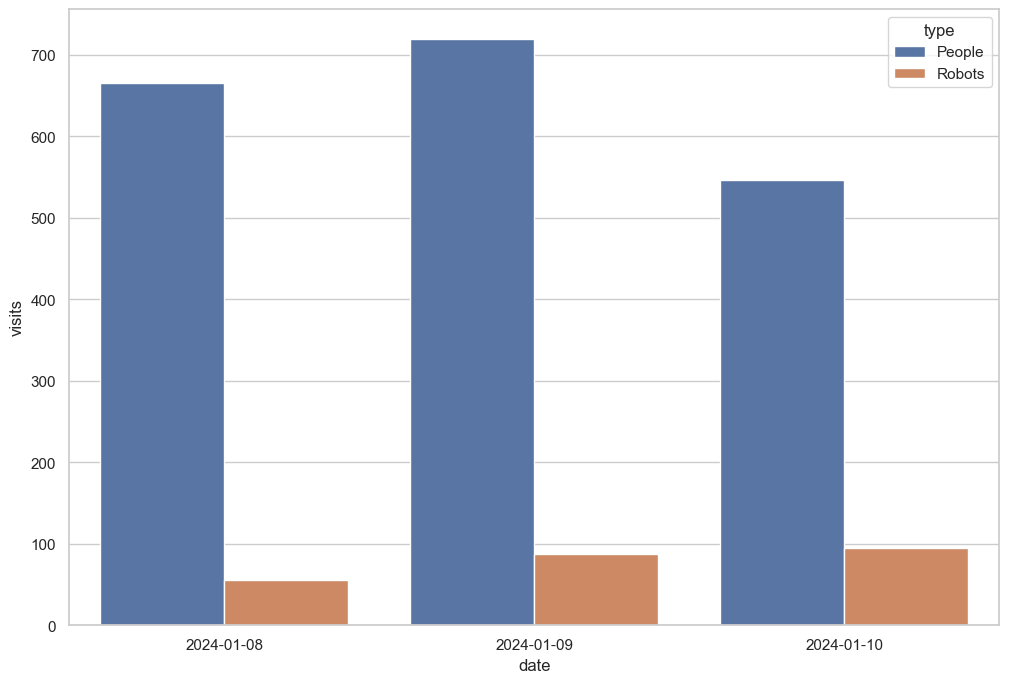

In [15]:
sns.set(style='whitegrid',
        rc={'figure.figsize': (12,8)}
)
sns.barplot(data=df,
            x='date',
            y='visits',
            hue='type')